# Endometriosis - Clustering
# Endothelial Cells - all datasets

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata
import os
import sys

def MovePlots(plotpattern, subplotdir):
    os.system('mkdir -p '+str(sc.settings.figdir)+'/'+subplotdir)
    os.system('mv '+str(sc.settings.figdir)+'/*'+plotpattern+'** '+str(sc.settings.figdir)+'/'+subplotdir)

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.figdir = './figures/cells/endothelial_dirty/'
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures

sys.executable

'/home/jovyan/my-conda-envs/sc_analysis/bin/python'

## Load data

In [2]:
path2datas = '/nfs/team292/lg18/endometriosis/integrated_objects/'
adata = sc.read(path2datas+'cells_endothelial_integrated.h5ad')
adata.X.shape

(23519, 17736)

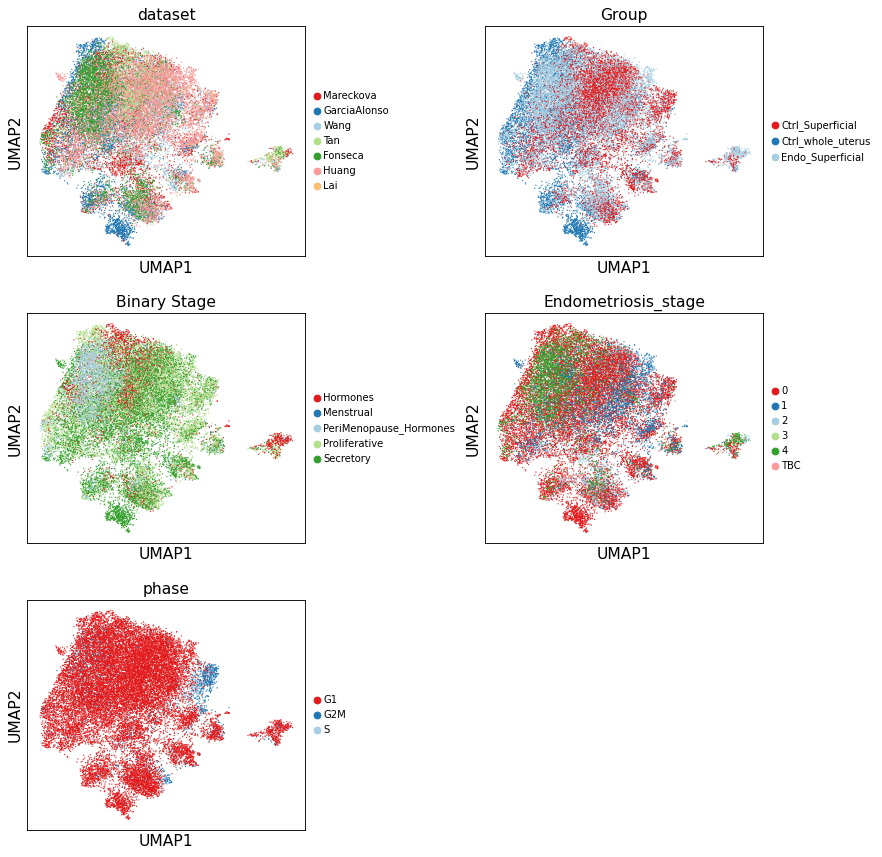

In [3]:
sc.pl.umap(adata, color=['dataset', 'Group', 'Binary Stage', 'Endometriosis_stage', 'phase'], wspace=0.5, legend_fontsize=9, ncols=2, save='_metadata.pdf')

In [4]:
annot_df = pd.read_csv('/nfs/team292/lg18/endometriosis/annotations/cells_endometrium_endothelial.csv',index_col=0)
annot_df.head()

# del adata.obs['Mareckova_endo_celltype'] 
annot = annot_df['Mareckova_endo_celltype'].to_dict()
adata.obs['Mareckova_endo_celltype'] = adata.obs_names.map(annot)
print(adata.obs['Mareckova_endo_celltype'].value_counts())

Arterial     15494
Doublet       4296
Venous        1697
LowQC         1580
Lymphatic      452
Name: Mareckova_endo_celltype, dtype: int64


/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (15,19,21,22,23,24,25,39,40,41,46,47,60,61,63,64,65) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


... storing 'Mareckova_endo_celltype' as categorical


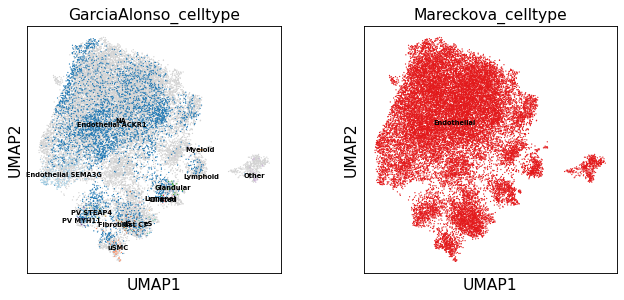

In [5]:
adata.obs['GarciaAlonso_celltype'] = adata.obs['GarciaAlonso_celltype'].replace('nan', np.NaN)
sc.pl.umap(adata, color=['GarciaAlonso_celltype', 'Mareckova_celltype'], legend_loc='on data', ncols = 2, legend_fontsize=6)

## Clustering the graph
As Seurat and many others, we use the leiden graph-clustering method (community detection based on optimizing modularity). It has been proposed for single-cell data by Levine et al. (2015).

In [6]:
sc.tl.leiden(adata, resolution=0.4)

running Leiden clustering
    finished: found 8 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:04)


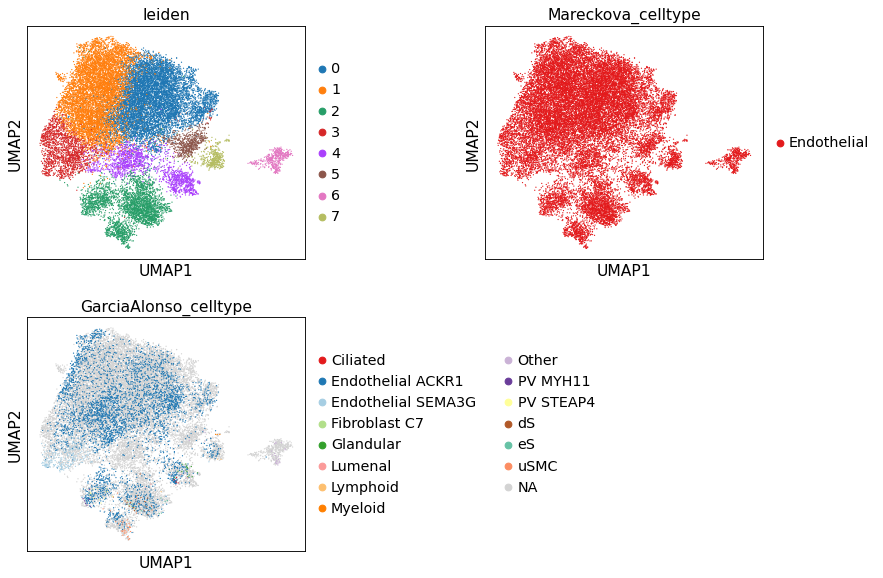

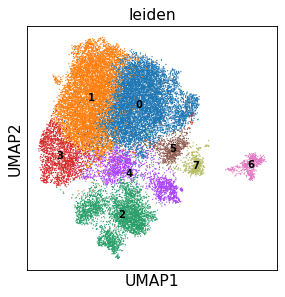

In [7]:
sc.pl.umap(adata, color=['leiden',  'Mareckova_celltype', 'GarciaAlonso_celltype'], wspace=0.5, ncols=2)
sc.pl.umap(adata, color=['leiden'],legend_loc='on data', legend_fontsize=9)

running Leiden clustering
    finished: found 9 clusters and added
    'leiden_R', the cluster labels (adata.obs, categorical) (0:00:00)


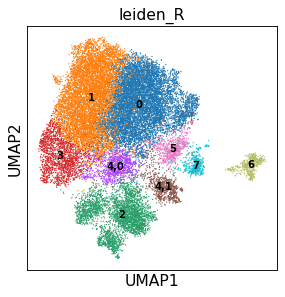

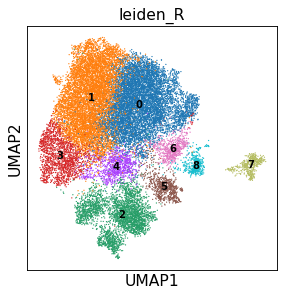

In [8]:
# split lowQC cluster
sc.tl.leiden(adata, resolution=0.2, restrict_to=('leiden', ['4']))
sc.pl.umap(adata, color='leiden_R',legend_loc='on data', legend_fontsize=9)
adata.obs['leiden_R'].cat.categories = [str(i) for i in range(len(adata.obs['leiden_R'].cat.categories))]
sc.pl.umap(adata, color='leiden_R',legend_loc='on data', legend_fontsize=9)
adata.obs['leiden'] = adata.obs['leiden_R']

running Leiden clustering
    finished: found 11 clusters and added
    'leiden_R', the cluster labels (adata.obs, categorical) (0:00:00)


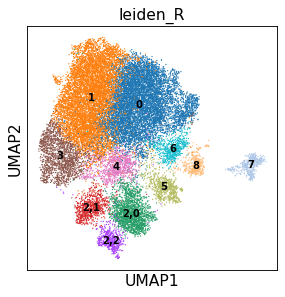

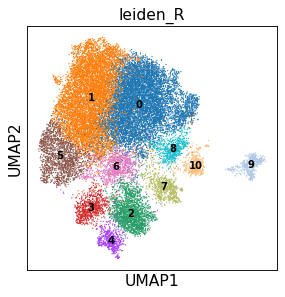

In [9]:
# split lowQC cluster
sc.tl.leiden(adata, resolution=0.2, restrict_to=('leiden', ['2']))
sc.pl.umap(adata, color='leiden_R',legend_loc='on data', legend_fontsize=9)
adata.obs['leiden_R'].cat.categories = [str(i) for i in range(len(adata.obs['leiden_R'].cat.categories))]
sc.pl.umap(adata, color='leiden_R',legend_loc='on data', legend_fontsize=9)
adata.obs['leiden'] = adata.obs['leiden_R']

running Leiden clustering
    finished: found 12 clusters and added
    'leiden_R', the cluster labels (adata.obs, categorical) (0:00:00)


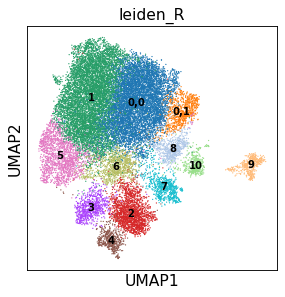

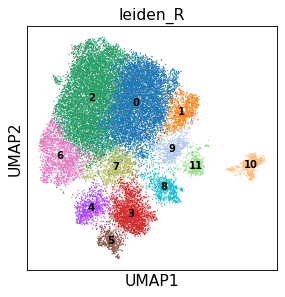

In [10]:
# split lowQC cluster
sc.tl.leiden(adata, resolution=0.2, restrict_to=('leiden', ['0']))
sc.pl.umap(adata, color='leiden_R',legend_loc='on data', legend_fontsize=9)
adata.obs['leiden_R'].cat.categories = [str(i) for i in range(len(adata.obs['leiden_R'].cat.categories))]
sc.pl.umap(adata, color='leiden_R',legend_loc='on data', legend_fontsize=9)
adata.obs['leiden'] = adata.obs['leiden_R']

# Explore leiden clusters
### Visualize general markers

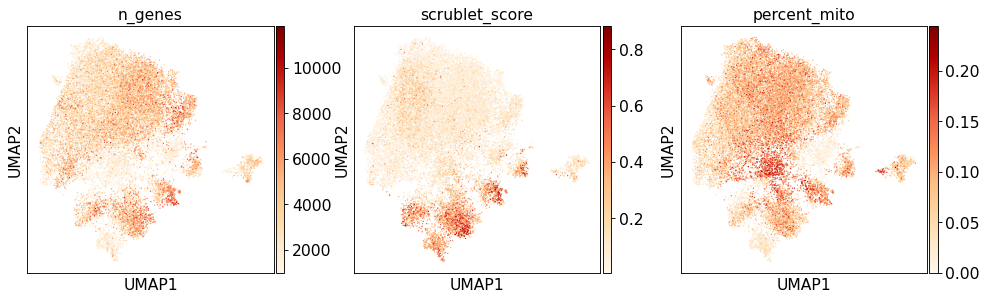

In [11]:
sc.pl.umap(adata, color=['n_genes','scrublet_score', 'percent_mito'], color_map='OrRd')

In [12]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)

normalizing by total count per cell
/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
    finished (0:00:01): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


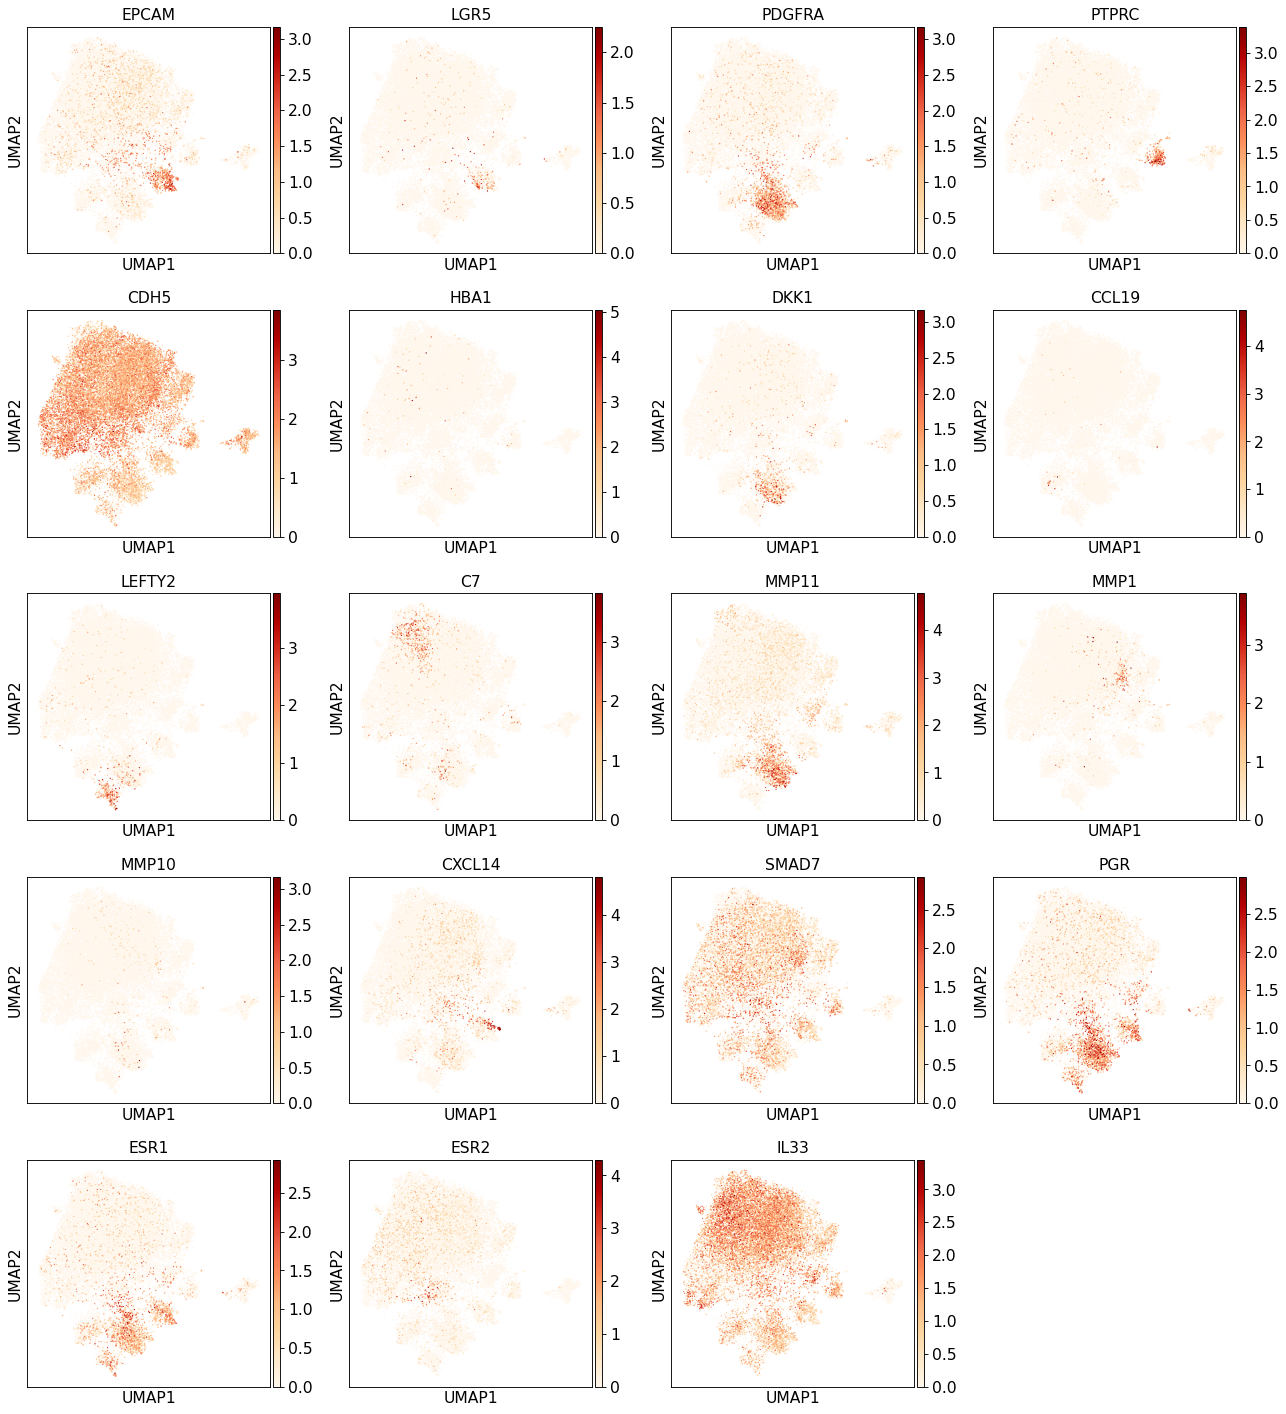

In [13]:
sc.pl.umap(adata, color=["EPCAM", 'LGR5',  "PDGFRA", 'PTPRC', 'CDH5', 'HBA1', 'DKK1', 'CCL19', 'LEFTY2', "C7", 
                        'MMP11', 'MMP1', 'MMP10', 'CXCL14',  'SMAD7', 'PGR', 'ESR1', 'ESR2', 'IL33'], color_map='OrRd', use_raw=False )

### Check global trends

/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
Trying to set attribute `.uns` of view, copying.


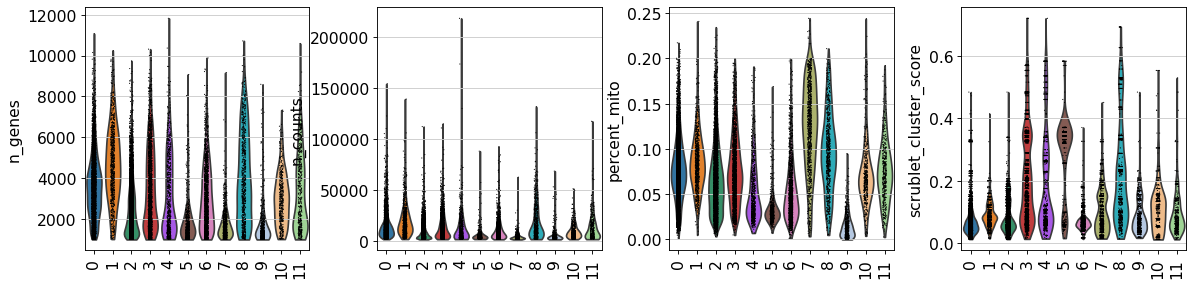

In [14]:
sc.pl.violin(adata[[ float(i) < 15 for i in adata.obs.leiden ]], keys= ['n_genes', 'n_counts', 'percent_mito', 'scrublet_cluster_score'], groupby = 'leiden', rotation = 90)
# sc.pl.violin(adata[[ float(i) >= 10 for i in adata.o`bs.leiden ]], keys= ['n_genes', 'n_counts', 'percent_mito', 'scrublet_cluster_score'], groupby = 'leiden', rotation = 90)
# sc.pl.violin(adata, keys= ['percent_mito', 'scrublet_score', 'scrublet_cluster_score'], groupby = 'leiden_R', rotation = 90)

# Finding marker genes

Compute a ranking for the highly differential genes in each cluster. Here, we simply rank genes with a t test, which agrees quite well with Seurat.

## All vs rest

In [15]:
# # Compute Mann-Withney test with scanpy
# sc.tl.rank_genes_groups(adata, groupby='leiden', use_raw=False) #, method='logreg'
# # Plot
# sc.pl.rank_genes_groups_dotplot(adata, n_genes=20, dendrogram=False, save='_scanpy.pdf', standard_scale = 'var')

In [16]:
def Barplot(which_var, adata, var='lineage', height=3, color = False):
    plotdata = pd.crosstab(adata.obs[var], adata.obs[which_var], normalize='index') * 100
    if 'category' in plotdata.index.dtype.name:
        plotdata.index.reorder_categories(adata.obs[var].cat.categories[::-1])

    if not color:
        ax1 = plotdata.plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (6,height), fontsize = 14, grid = False)
    else:
        ax1 = plotdata.plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (6,height), fontsize = 14, grid = False, color = color)
    ax1.set_title(which_var+' %')
    ax1.set_ylabel(var)
    horiz_offset = 1
    vert_offset = 1.
    ax1 = ax1.legend(bbox_to_anchor = (horiz_offset, vert_offset))
    ax1.figure.savefig(str(sc.settings.figdir)+'/barplot_'+var+'_proportions_'+which_var+'.pdf', bbox_inches='tight',
                       dpi=300, orientation='landscape', format= 'pdf', optimize=True)

/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "optimize" which is no longer supported as of 3.3 and will become an error two minor releases later
  app.launch_new_instance()
/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "optimize" which is no longer supported as of 3.3 and will become an error two minor releases later
  app.launch_new_instance()
/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "optimize" which is no longer supported as of 3.3 and will become an error two minor releases later
  app.launch_new_instance()
/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning

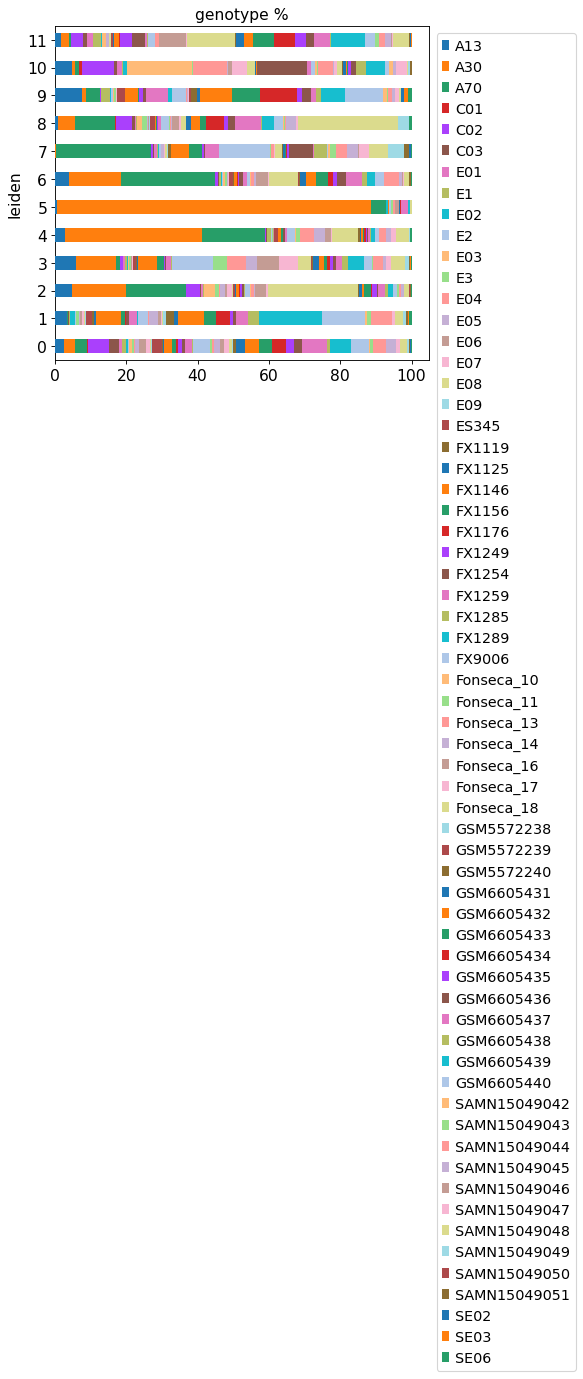

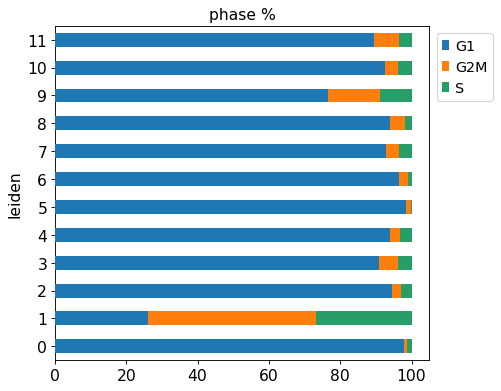

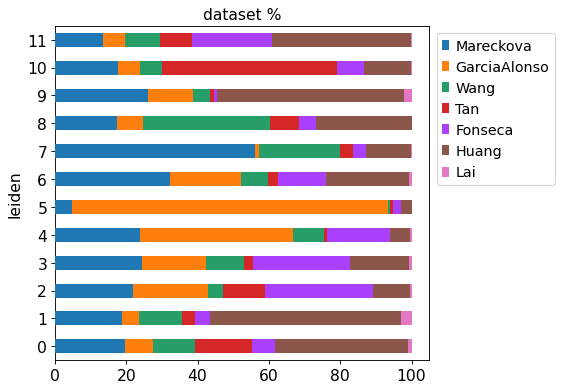

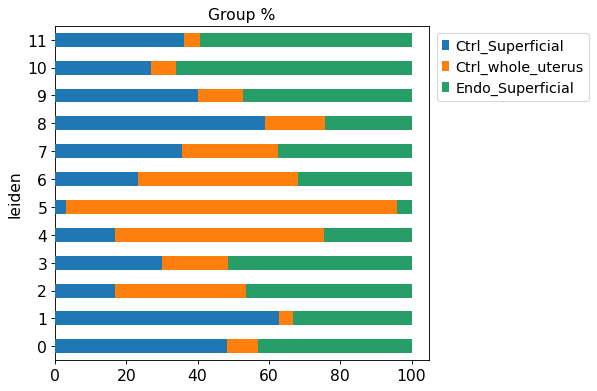

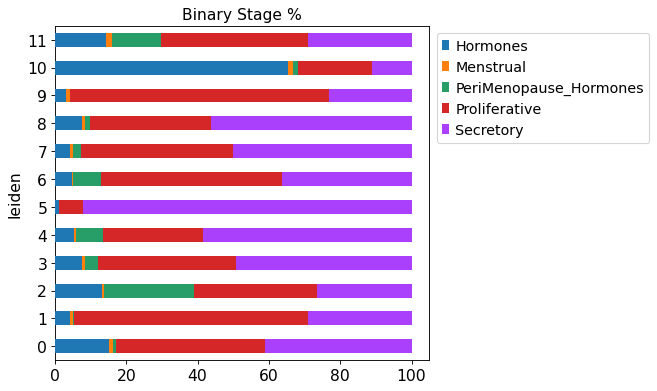

In [17]:
Barplot('genotype', adata, var='leiden', height=5.5)
Barplot('phase', adata, var='leiden', height=5.5)
Barplot('dataset', adata, var='leiden', height=5.5)
Barplot('Group', adata, var='leiden', height=5.5)
Barplot('Binary Stage', adata, var='leiden', height=5.5)

In [18]:
marker_genes = {
    'Endothelial': {'PECAM1', 'VWF', 'CDH5'},
    'ACKR1': {'ACKR1', 'TNC', 'CCL14'},
    'SEMA3G': {'SEMA3G', 'GJA5'},
    'arterial': {'PRND', 'GJA4', 'CXCR4', 'PGF'},
    'fenestrated': {'APLNR', 'PLVAP', 'PLAT'},
    'lymphatic': {'RELN', 'PROX1', 'CCL21'},
    'venous': {'SPP1', 'ECM1'}, # 'OIT3'
    'Epithelial lineage': {'EPCAM', 'PAX8'},
    'Mesenchymal lineage': {"PDGFRA", 'OGN','DCN', 'LUM'},
    'Fibroblast C7': {'C7'},
    'eS':{'MMP11', 'CRABP2', 'ECM1'},
    'dS':{'DKK1', 'IL15', 'CFD'}, 
    'PV lineage':{'MYH11', 'ACTA2', "MCAM", 'RGS5'},
    'uSMCs':{'LEFTY2', 'ACTG2', 'ITGA11'},
    'Immune': {'PTPRC'},
    'Lymphoid': {'CD3D', 'NCAM1' , 'NKG7'},
    'Myeloid': {'CSF1R', 'CD14'},
    'lowQC': {"HBA1", "HBA2"}
}

marker_genes_short = {
    'Epithelial lineage': {'EPCAM', 'PAX8'},    
#     'Mesothelial': {'UPK3B', 'LRRN4'},
    'Mesenchymal lineage': {"PDGFRA", 'OGN'}, # 'DCN', 'LUM'
    'PV lineage':{'MYH11', 'ACTA2', "MCAM"},
    'uSMCs':{'LEFTY2', 'ACTG2', 'ITGA11'},
    'Endothelial': {'PECAM1', 'VWF', 'CDH5'},
    'Immune': {'PTPRC'},
    'Lymphoid': {'CD3D', 'NCAM1' , 'NKG7'},
    'Myeloid': {'CSF1R', 'CD14'},
    'Erythroid': {"HBB", "HBA1"}
}

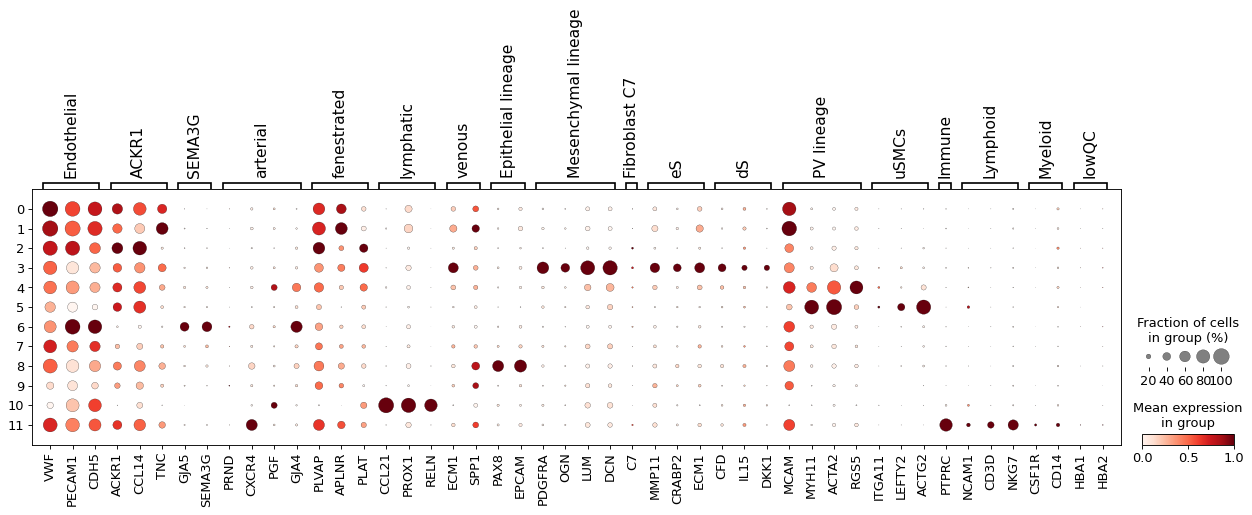

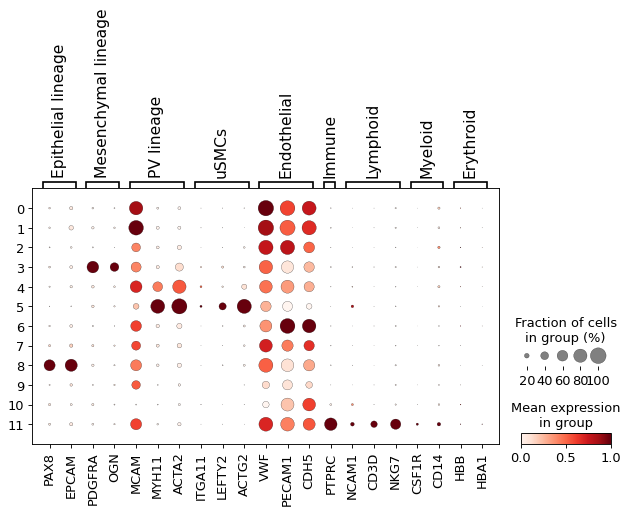

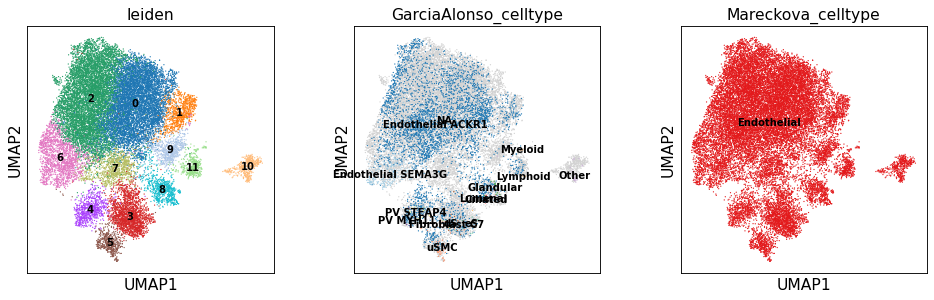

In [19]:
sc.pl.dotplot(adata, marker_genes, groupby='leiden', standard_scale='var', save='MARKERS_leiden.pdf')
sc.pl.dotplot(adata, marker_genes_short, groupby='leiden', standard_scale='var')
sc.pl.umap(adata, color=['leiden', 'GarciaAlonso_celltype', 'Mareckova_celltype'],legend_loc='on data', legend_fontsize=9, save='_leiden.pdf')

# Cell's Annotation

In [20]:
marker_genes = {
    'Endothelial': {'PECAM1', 'VWF', 'CDH5'},
    'ACKR1': {'ACKR1', 'TNC', 'CCL14'},
    'SEMA3G': {'SEMA3G', 'GJA5'},
    'arterial': {'PRND', 'GJA4', 'CXCR4', 'PGF'},
    'fenestrated': {'APLNR', 'PLVAP', 'PLAT'},
    'lymphatic': {'RELN', 'PROX1', 'CCL21'},
    'venous': {'SPP1', 'ECM1'}, # 'OIT3'
    'Epithelial lineage': {'EPCAM', 'PAX8'},
    'Mesenchymal lineage': {"PDGFRA", 'OGN','DCN', 'LUM'},
    'Fibroblast C7': {'C7'},
    'eS':{'MMP11', 'CRABP2', 'ECM1'},
    'dS':{'DKK1', 'IL15', 'CFD'}, 
    'PV lineage':{'MYH11', 'ACTA2', "MCAM", 'RGS5'},
    'uSMCs':{'LEFTY2', 'ACTG2', 'ITGA11'},
    'Immune': {'PTPRC'},
    'Lymphoid': {'CD3D', 'NCAM1' , 'NKG7'},
    'Myeloid': {'CSF1R', 'CD14'},
    'lowQC': {"HBA1", "HBA2"}
}

... storing 'Mareckova_endo_celltype' as categorical
... storing 'Mareckova_endo_lineage' as categorical


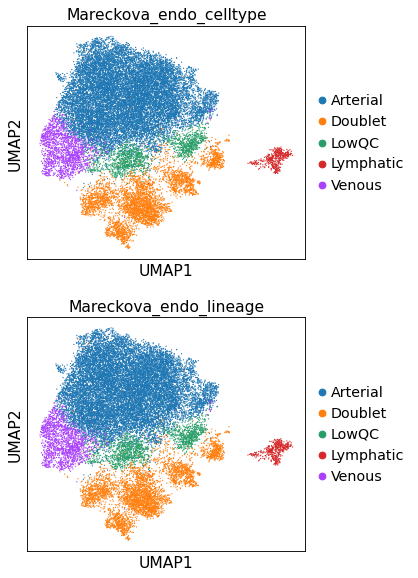

In [21]:
adata.obs['Mareckova_endo_celltype'] = adata.obs['leiden'].tolist()
adata.obs.at[adata.obs['Mareckova_endo_celltype'] == '0', 'Mareckova_endo_celltype'] = 'Arterial'
adata.obs.at[adata.obs['Mareckova_endo_celltype'] == '1', 'Mareckova_endo_celltype'] = 'Arterial'
adata.obs.at[adata.obs['Mareckova_endo_celltype'] == '2', 'Mareckova_endo_celltype'] = 'Arterial'
adata.obs.at[adata.obs['Mareckova_endo_celltype'] == '3', 'Mareckova_endo_celltype'] = 'Doublet'
adata.obs.at[adata.obs['Mareckova_endo_celltype'] == '4', 'Mareckova_endo_celltype'] = 'Doublet'
adata.obs.at[adata.obs['Mareckova_endo_celltype'] == '5', 'Mareckova_endo_celltype'] = 'Doublet'
adata.obs.at[adata.obs['Mareckova_endo_celltype'] == '6', 'Mareckova_endo_celltype'] = 'Venous'
adata.obs.at[adata.obs['Mareckova_endo_celltype'] == '7', 'Mareckova_endo_celltype'] = 'LowQC'
adata.obs.at[adata.obs['Mareckova_endo_celltype'] == '8', 'Mareckova_endo_celltype'] = 'Doublet'
adata.obs.at[adata.obs['Mareckova_endo_celltype'] == '9', 'Mareckova_endo_celltype'] = 'LowQC'
adata.obs.at[adata.obs['Mareckova_endo_celltype'] == '10', 'Mareckova_endo_celltype'] = 'Lymphatic'
adata.obs.at[adata.obs['Mareckova_endo_celltype'] == '11', 'Mareckova_endo_celltype'] = 'Doublet'



set(adata.obs['Mareckova_endo_celltype'])
adata.obs['Mareckova_endo_lineage'] = [str(i).split('_', 1)[0] for i in adata.obs['Mareckova_endo_celltype'] ]

sc.pl.umap(adata, color=['Mareckova_endo_celltype', 'Mareckova_endo_lineage'], ncols=1)
# adata.obs['Mareckova_endo_celltype'].cat.reorder_categories(['Epithelial', 'Epithelial_MUC5B', 'Epithelial_Glands', 'Epithelial_Ciliated', 'Epithelial_TP63+KRT5+',
#                                                         'Mesothelial', 
#                                                         'Mesenchymal_eS', 'Mesenchymal_dS', 'Mesenchymal_C7', 
#                                                         'PV_STEAP4', 'PV_MYH11', 'uSMCs',
#                                                         'Endothelial', 'Endothelial_LEC', 'Myeloid', 'Lymphoid',
#                                                         'EcO_Mesenchymal',
#                                                         'EcO_Mesenchymal_COL10A1'
#                                                         'EcO_Granulosa', 'EcO_Theca',
#                                                         'LowQC', 'Doublet'], inplace=True)

# sc.pl.umap(adata, color=['Mareckova_endo_celltype'])

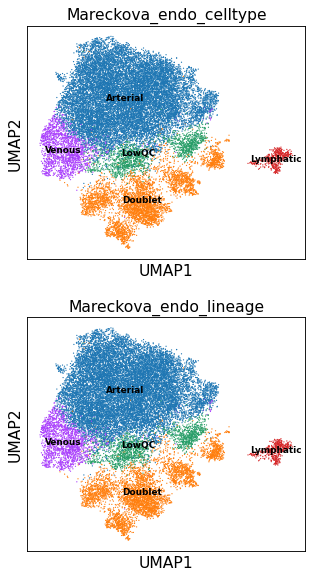

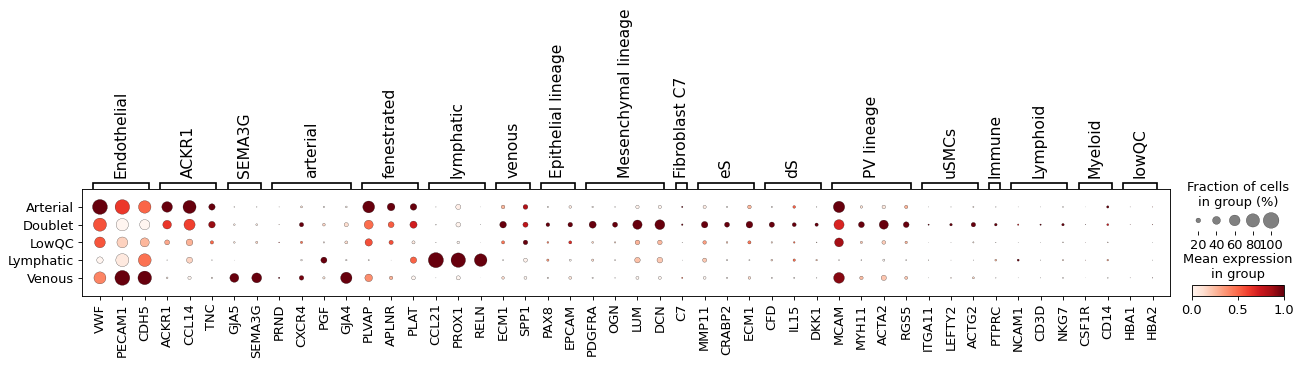

... storing 'leiden_celltype' as categorical
... storing 'celltype_leiden' as categorical


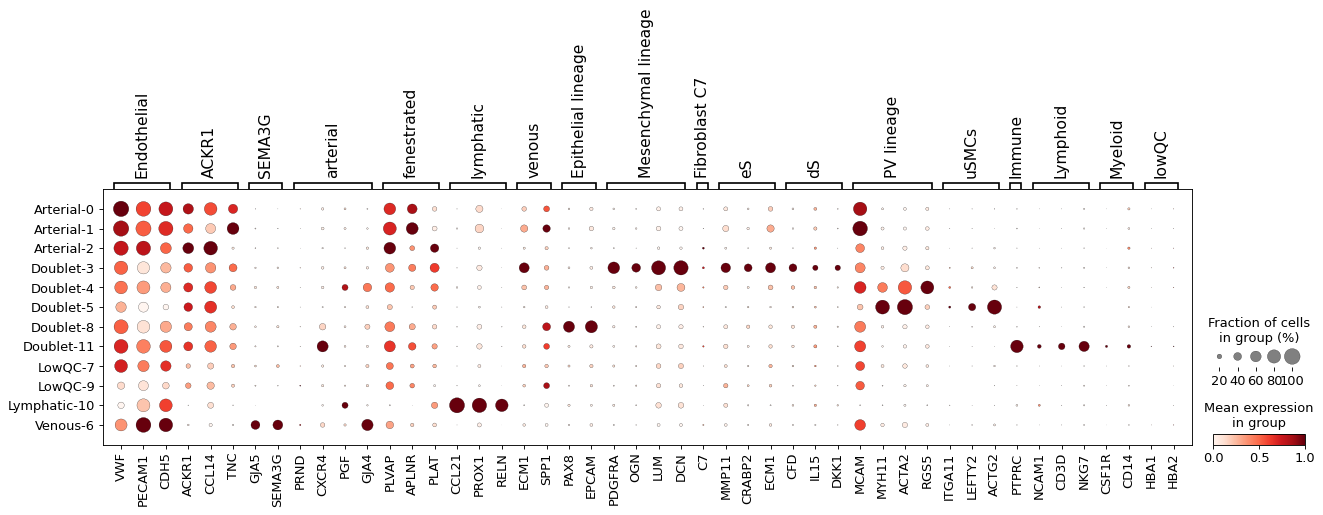

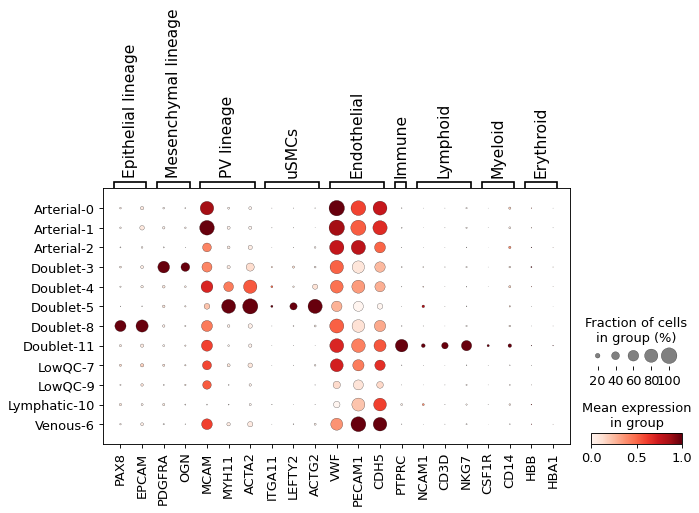

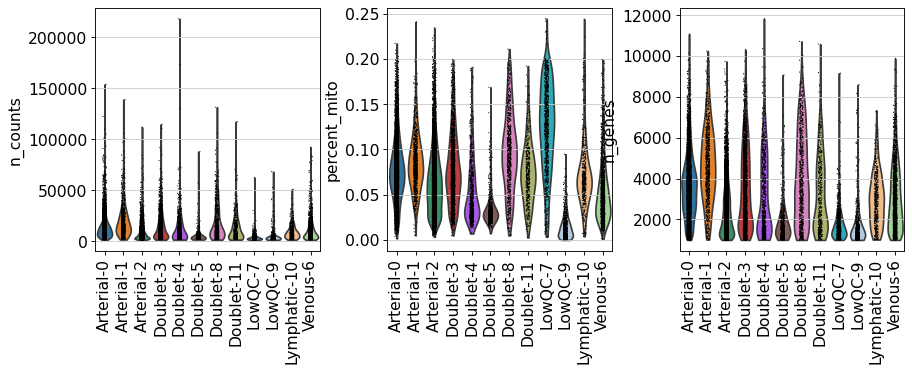

In [22]:
sc.pl.umap(adata, color=['Mareckova_endo_celltype', 'Mareckova_endo_lineage'], legend_loc='on data', legend_fontsize=8, ncols=1, save='_mesenchymal_celltype.pdf')
sc.pl.dotplot(adata, marker_genes, groupby='Mareckova_endo_celltype', standard_scale='var', save='MARKERS_celltype.pdf')



adata.obs['leiden_celltype'] =  [a + '-' + b  for a, b in zip(adata.obs['leiden'], adata.obs['Mareckova_endo_celltype'])]
adata.obs['celltype_leiden'] =  [a + '-' + b  for b, a in zip(adata.obs['leiden'], adata.obs['Mareckova_endo_celltype'])]
sc.pl.dotplot(adata, marker_genes, groupby='celltype_leiden', standard_scale='var')
sc.pl.dotplot(adata, marker_genes_short, groupby='celltype_leiden', standard_scale='var')
sc.pl.violin(adata, ['n_counts', 'percent_mito', 'n_genes'], groupby='celltype_leiden', rotation = 90) #hPGCs

In [23]:
# adata.write('x.h5ad')
pd.DataFrame(adata.obs).to_csv('/nfs/team292/lg18/endometriosis/annotations/cells_endometrium_endothelial.csv')

/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "optimize" which is no longer supported as of 3.3 and will become an error two minor releases later
  app.launch_new_instance()
/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "optimize" which is no longer supported as of 3.3 and will become an error two minor releases later
  app.launch_new_instance()
/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "optimize" which is no longer supported as of 3.3 and will become an error two minor releases later
  app.launch_new_instance()
/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning

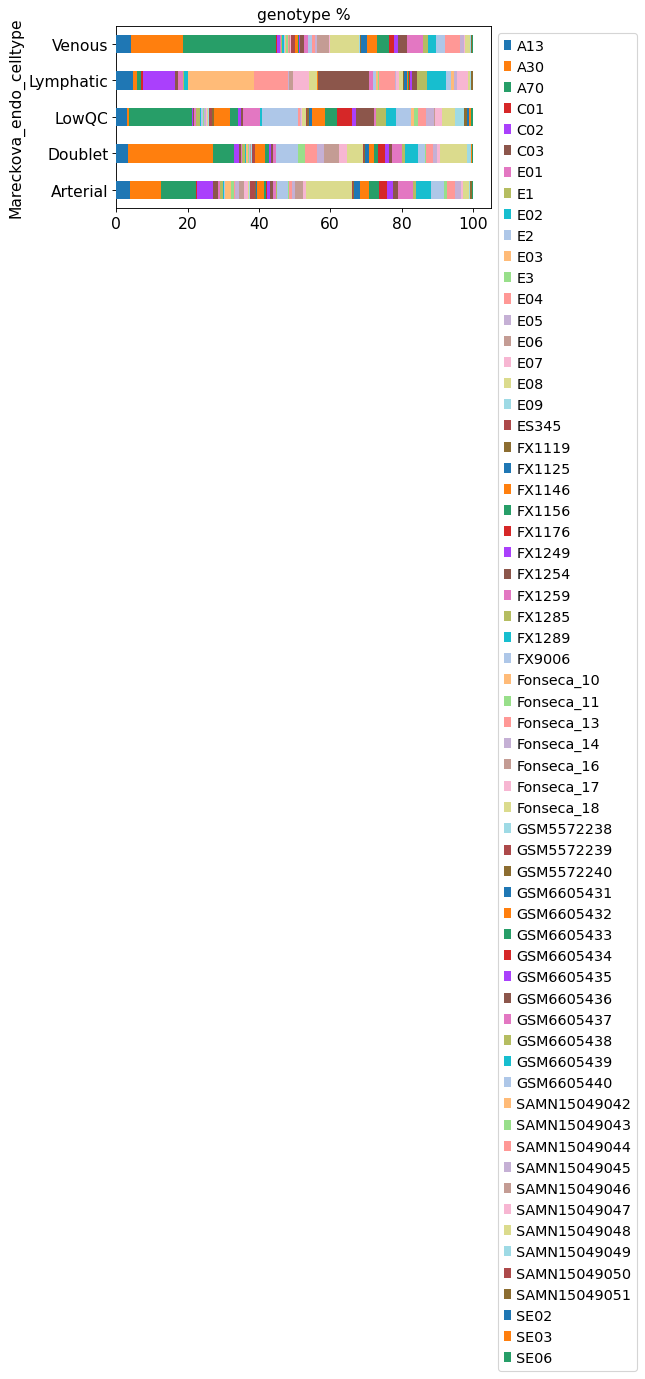

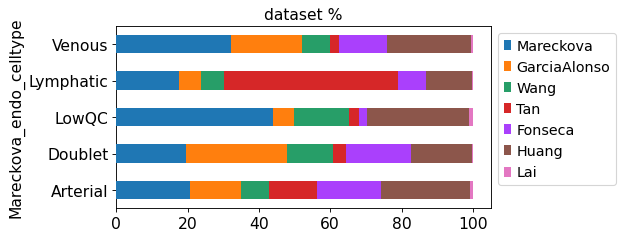

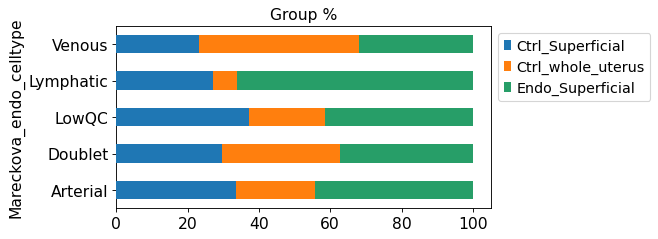

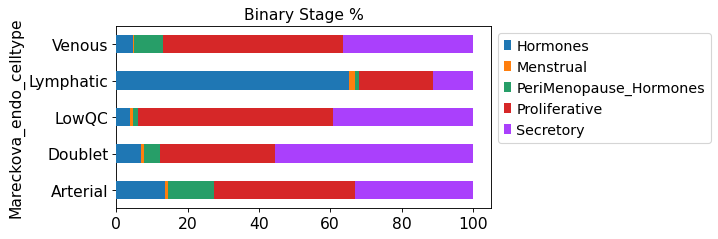

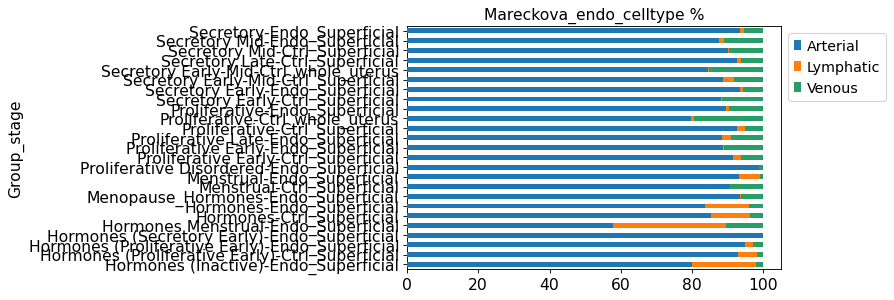

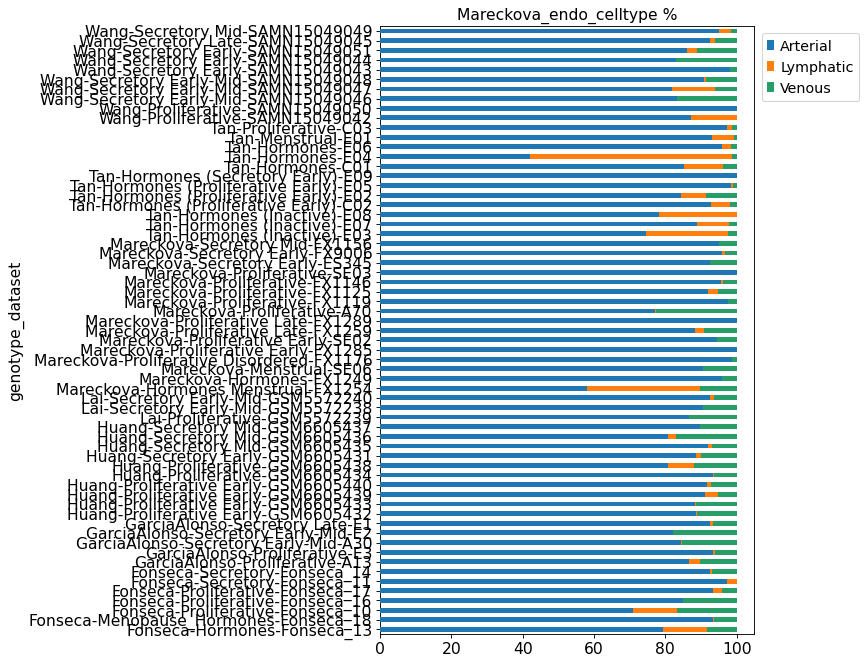

In [24]:
sampleID = [a + '-' + b + '-' + c  for a, b, c in zip(adata.obs['dataset'], adata.obs['Stage'],adata.obs['genotype'])]
adata.obs['genotype_dataset'] = sampleID

sampleID = [a + '-' + b  for a, b in zip(adata.obs['Stage'], adata.obs['Group'])]
adata.obs['Group_stage'] = sampleID

Barplot('genotype', adata, var='Mareckova_endo_celltype', height=3)
Barplot('dataset', adata, var='Mareckova_endo_celltype', height=3)
Barplot('Group', adata, var='Mareckova_endo_celltype', height=3)
Barplot('Binary Stage', adata, var='Mareckova_endo_celltype', height=3)



Barplot('Mareckova_endo_celltype', adata[[ i not in ['Doublet', 'LowQC', 'Other'] for i in adata.obs.Mareckova_endo_celltype ]], 
        var='Group_stage', height=4, color=adata.uns['Mareckova_endo_celltype_colors'])
Barplot('Mareckova_endo_celltype', adata[[ i not in ['Doublet', 'LowQC', 'Other'] for i in adata.obs.Mareckova_endo_celltype ]], 
        var='genotype_dataset', height=10, color=adata.uns['Mareckova_endo_celltype_colors'])

# TF-IDF

In [25]:
import anndata
adataDown = adata[[ i in ["G1"] for i in adata.obs.phase ]]
sc.pp.filter_cells(adataDown, min_genes=2000)
sc.pp.filter_genes(adataDown, min_cells=5)
# print(adataDown.obs['leiden'].value_counts())

### Dowsample the whole dataset UN-EVEN
# adataDown = sc.pp.subsample(XX, fraction=0.25, random_state=0, copy=True) 


### Downsample to the smallest pop size
target_cells = 50

adataDown.obs['cell'] = adataDown.obs.index
adatas = [adataDown[adataDown.obs['leiden'].isin([cl])] for cl in adataDown.obs['leiden'].cat.categories]
# adatas = [adataDown[ adataDown.obs['leiden']==cl ] for cl in adataDown.obs['leiden'].cat.categories]

for dat in adatas:
    if dat.n_obs > target_cells:
        sc.pp.subsample(dat, n_obs=target_cells, random_state=0)
adata_downsampled = adatas[0].concatenate(*adatas[1:])
adataDown = adataDown[[ i in adata_downsampled.obs.cell.tolist() for i in adataDown.obs['cell'] ]]

sc.pp.filter_genes(adataDown, min_cells=10)
print(adataDown.obs['leiden'].value_counts())

del adata_downsampled
del adatas

/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
filtered out 7842 cells that have less than 2000 genes expressed
Trying to set attribute `.obs` of view, copying.
filtered out 314 genes that are detected in less than 5 cells
filtered out 4001 genes that are detected in less than 10 cells
Trying to set attribute `.var` of view, copying.


0     50
1     50
2     50
3     50
4     50
5     50
6     50
7     50
8     50
9     50
10    50
11    50
Name: leiden, dtype: int64


In [26]:
import rpy2.rinterface_lib.callbacks
import logging
# Itoliste R warning messages
#Note: this can be commented out to get more verbose R output
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)
import anndata2ri
anndata2ri.activate()
%load_ext rpy2.ipython


In [27]:
# This is just to allow moving adata to R without errors
adataDown.X = adataDown.X.toarray()

idx = ['n_genes', 'sample',  'percent_mito', 'n_counts', 'batch', 'S_score', 'G2M_score', 'phase', 
       'scrublet_score', 'scrublet_cluster_score', 'zscore', 'bh_pval', 'bonf_pval', 'is_doublet']
for i in idx:
    del adataDown.obs[i]
    
adataDown.obs['leiden'] = adataDown.obs['leiden'].astype(str)

del adataDown.obsm['X_scVI']
del adataDown.obsm['X_umap']
del adataDown.obsp['connectivities']
del adataDown.obsp['distances']
del adataDown.uns

In [28]:
%%R -i adataDown
adataDown

class: SingleCellExperiment 
dim: 13421 600 
metadata(0):
assays(1): X
rownames(13421): A1BG A2M ... ZYX ZZEF1
rowData names(220): gene_ids.0.Fonseca feature_types.0.Fonseca ...
  highly_variable_nbatches n_cells
colnames(600): HCA_A_RepT_RNA13247830_AAATGCCTCAATACCG-Mareckova
  HCA_A_RepT_RNA13247830_AACTCAGGTTAGGGTG-Mareckova ...
  GSM5572240_GACGCTGCAGAGCCCT-Lai GSM5572240_TTGTTCATCGACCATA-Lai
colData names(62): library StudyName ... Group_stage cell
reducedDimNames(0):
altExpNames(0):


### By Leiden

In [29]:
%%R -o df_tfIDF -o topgenes_tfIDF

library(Seurat)
library(SoupX)
library(dplyr)
seurat_andata = as.Seurat(adataDown, counts = "X", data = "X")
Idents(seurat_andata) = seurat_andata$celltype_leiden


df_tfIDF = quickMarkers(toc = seurat_andata@assays$RNA@counts, clusters = Idents(seurat_andata), N = 500)

df_tfIDF$cluster = factor(df_tfIDF$cluster, levels = unique(sort(df_tfIDF$cluster ))  )
topgenes_tfIDF = subset(df_tfIDF, qval <= 0.05) %>%
  group_by(cluster) %>%
  group_map(~ head(.x, 20L)$gene)
names(topgenes_tfIDF) = paste('cl', levels(df_tfIDF$cluster) )

In [30]:
df_tfIDF.to_csv('TFIDF_leiden.tsv', index=False, sep='\t')

... storing 'genotype_dataset' as categorical
... storing 'Group_stage' as categorical


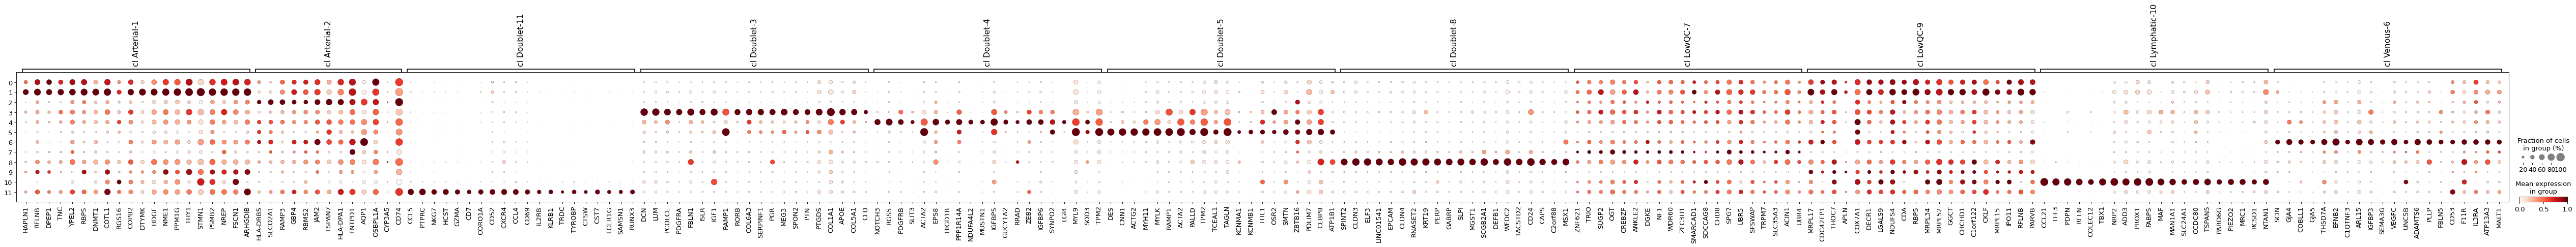

In [31]:
topgenes_tfIDF = dict(zip(topgenes_tfIDF.names, map(list,list(topgenes_tfIDF)))) # this is to convert into a dictionary for plotting
for i in topgenes_tfIDF.keys():
    topgenes_tfIDF[i] = [value for value in topgenes_tfIDF[i] if value in adata.var_names] 
    
    
sc.pl.dotplot(adata, topgenes_tfIDF, groupby='leiden', standard_scale = 'var', save='TFIDF_leiden.pdf')#topgenes_tfIDF

## By celltype

In [32]:
import anndata
adataDown = adata[[ i in ["G1"] for i in adata.obs.phase ]]
sc.pp.filter_cells(adataDown, min_genes=2000)
sc.pp.filter_genes(adataDown, min_cells=5)
adataDown = adataDown[[ i not in ['Doublet', 'LowQC'] for i in adataDown.obs.Mareckova_endo_celltype ]]
# print(adataDown.obs['leiden'].value_counts())

### Dowsample the whole dataset UN-EVEN
# adataDown = sc.pp.subsample(XX, fraction=0.25, random_state=0, copy=True) 


### Downsample to the smallest pop size
target_cells = 100

adataDown.obs['cell'] = adataDown.obs.index
adatas = [adataDown[adataDown.obs['Mareckova_endo_celltype'].isin([cl])] for cl in adataDown.obs['Mareckova_endo_celltype'].cat.categories]
# adatas = [adataDown[ adataDown.obs['leiden']==cl ] for cl in adataDown.obs['leiden'].cat.categories]

for dat in adatas:
    if dat.n_obs > target_cells:
        sc.pp.subsample(dat, n_obs=target_cells, random_state=0)
adata_downsampled = adatas[0].concatenate(*adatas[1:])
adataDown = adataDown[[ i in adata_downsampled.obs.cell.tolist() for i in adataDown.obs['cell'] ]]

sc.pp.filter_genes(adataDown, min_cells=10)
print(adataDown.obs['Mareckova_endo_celltype'].value_counts())

del adata_downsampled
del adatas

/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
filtered out 7842 cells that have less than 2000 genes expressed
Trying to set attribute `.obs` of view, copying.
filtered out 314 genes that are detected in less than 5 cells
Trying to set attribute `.obs` of view, copying.
filtered out 5944 genes that are detected in less than 10 cells
Trying to set attribute `.var` of view, copying.


Arterial     100
Lymphatic    100
Venous       100
Name: Mareckova_endo_celltype, dtype: int64


In [33]:
import rpy2.rinterface_lib.callbacks
import logging
# Itoliste R warning messages
#Note: this can be commented out to get more verbose R output
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)
import anndata2ri
anndata2ri.activate()
%load_ext rpy2.ipython


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [34]:
# This is just to allow moving adata to R without errors
adataDown.X = adataDown.X.toarray()

idx = ['n_genes', 'sample',  'percent_mito', 'n_counts', 'batch', 'S_score', 'G2M_score', 'phase', 
       'scrublet_score', 'scrublet_cluster_score', 'zscore', 'bh_pval', 'bonf_pval', 'is_doublet']
for i in idx:
    del adataDown.obs[i]
    
adataDown.obs['leiden'] = adataDown.obs['leiden'].astype(str)

del adataDown.obsm['X_scVI']
del adataDown.obsm['X_umap']
del adataDown.obsp['connectivities']
del adataDown.obsp['distances']
del adataDown.uns

In [35]:
%%R -i adataDown
adataDown

class: SingleCellExperiment 
dim: 11478 300 
metadata(0):
assays(1): X
rownames(11478): A1BG A2M ... ZYX ZZEF1
rowData names(220): gene_ids.0.Fonseca feature_types.0.Fonseca ...
  highly_variable_nbatches n_cells
colnames(300): HCA_A_RepT_RNA13247830_AAACGGGGTAAATGTG-Mareckova
  HCA_A_RepT_RNA13247830_AAAGCAACATGCCTAA-Mareckova ...
  GSM6605436_TTTACCATCGCACGGT-Huang GSM5572238_TCTGTCGGTGCCTGCA-Lai
colData names(62): library StudyName ... Group_stage cell
reducedDimNames(0):
altExpNames(0):


In [36]:
%%R -o df_tfIDF -o topgenes_tfIDF

library(Seurat)
library(SoupX)
library(dplyr)
seurat_andata = as.Seurat(adataDown, counts = "X", data = "X")
Idents(seurat_andata) = seurat_andata$Mareckova_endo_celltype


df_tfIDF = quickMarkers(toc = seurat_andata@assays$RNA@counts, clusters = Idents(seurat_andata), N = 500)

df_tfIDF$cluster = factor(df_tfIDF$cluster, levels = unique(df_tfIDF$cluster)  )
topgenes_tfIDF = subset(df_tfIDF, qval <= 1) %>%
  group_by(cluster) %>%
  group_map(~ head(.x, 30L)$gene)
names(topgenes_tfIDF) = unique(df_tfIDF$cluster)

In [37]:
df_tfIDF.to_csv('TFIDF_celltype.tsv', index=False, sep='\t')

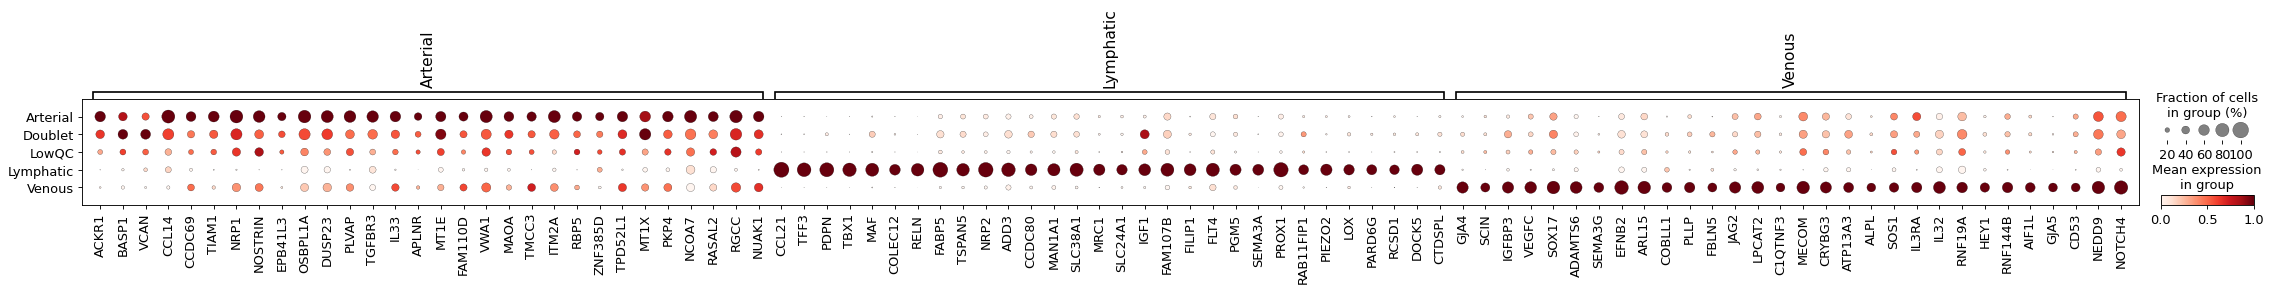

In [38]:
topgenes_tfIDF = dict(zip(topgenes_tfIDF.names, map(list,list(topgenes_tfIDF)))) # this is to convert into a dictionary for plotting
for i in topgenes_tfIDF.keys():
    topgenes_tfIDF[i] = [value for value in topgenes_tfIDF[i] if value in adata.var_names] 
    
    
sc.pl.dotplot(adata, topgenes_tfIDF, groupby='Mareckova_endo_celltype', standard_scale = 'var', save='TFIDF_celltype.pdf')#topgenes_tfIDF

In [39]:
adata.write('/nfs/team292/lg18/endometriosis/clustered_objects/cells_endothelial.h5ad')

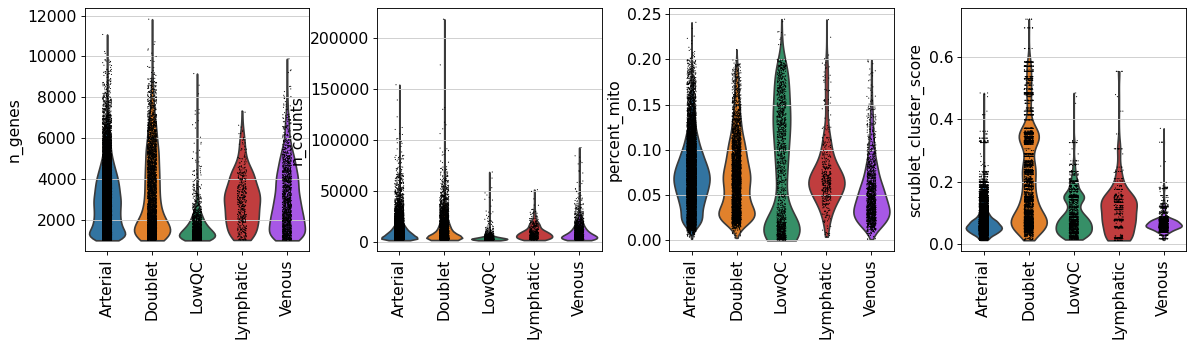

In [40]:
sc.pl.violin(adata, keys= ['n_genes', 'n_counts', 'percent_mito', 'scrublet_cluster_score'], groupby = 'Mareckova_endo_celltype', rotation = 90)
